# Operazioni di base con OpenCV

## Info
Info at <https://opencv.org>

OpenCV (Open Source Computer Vision Library) is an open source computer vision and machine learning software library. OpenCV was built to provide a common infrastructure for computer vision applications and to accelerate the use of machine perception in the commercial products. Being a BSD-licensed product, OpenCV makes it easy for businesses to utilize and modify the code.

## Installazione
Per le info di installazione si può consultare questa pagina <https://pypi.org/project/opencv-python/>

Per l'uso con questi notebook è consigliata la versione completa headless (per sistemi senza GUI)

    pip install opencv-contrib-python-headless

In [1]:
import os
import numpy as np
import cv2 # OpenCV-Python
%matplotlib inline
import matplotlib.pyplot as plt

print("OpenCV-Python Version %s" % cv2.__version__)

# in questa folder sono memorizzati alcuni file a supporto (path relativo al notebook corrente)
IMGSRC = 'data'

def myResourcePath(fname):
    filename = os.path.join(IMGSRC, fname)
    if not os.path.exists(filename):
        raise RuntimeError(f'file not found {filename}')
    return filename

OpenCV-Python Version 4.2.0


# Open/display an image

In [2]:
img = cv2.imread(myResourcePath('car.jpg'), cv2.IMREAD_COLOR)

# If the image path is wrong, the resulting img will be none
if img is None:
    print('Open Error')
else:
    print('Image Loaded')

Image Loaded


In [3]:
# Check the resulting img
print(type(img))
print(img.shape)
print(img.dtype)
print(img[:2, :2, :])  # Right-upper-most few pixels of the image

<class 'numpy.ndarray'>
(133, 200, 3)
uint8
[[[128 123 122]
  [126 121 120]]

 [[126 121 120]
  [127 122 121]]]


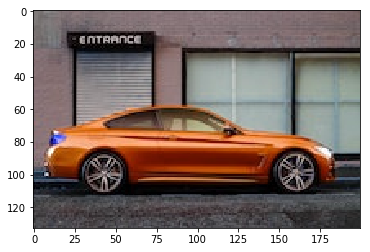

In [29]:
plt.imshow(cv2.imread(myResourcePath('car.jpg'), cv2.IMREAD_COLOR))

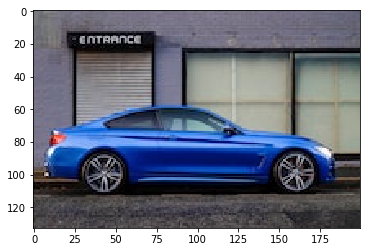

In [4]:
# display an image using matplotlib
# plt.imshow(img) # => The color of this line is wrong
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

# Basic operations on Images
## 1. Draw an object

- `cv2.line(image, startPoint, endPoint, rgb, thinkness)`
- `cv2.rectangle(image, topLeft, bottomRight, rgb, thinkness)`
- `cv2.circle(image, center, radius, rgb, thinkness)`
- `cv2.ellipse(image, center, axes, angle, startAngle, endAngle, rgb, thinkness)`

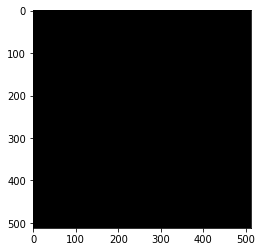

In [5]:
# Create a black image
img2 = np.zeros((512,512,3), np.uint8)
plt.imshow(img2)

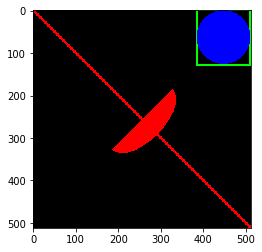

In [6]:
# Draw a line using cv2.line(image, startPoint, endPoint, rgb, thinkness)
cv2.line(img2, (0,0), (511,511), (255,0,0), 5)
# => Diagonal red line with thickness of 5 px

# Draw a rectangle using cv2.rectangle(image, topLeft, bottomRight, rgb, thinkness)
cv2.rectangle(img2, (384,0), (510,128), (0,255,0), 3)
# => Green rectangle with thickness of 3 px

# Draw a circle using cv2.circle(image, center, radius, rgb, thinkness)
cv2.circle(img2, (447,63), 63, (0,0,255), -1)
# => Blue filled circle(note that the thinkness is -1)

# Draw a ellipse using cv2.ellipse(image, center, axes, angle, startAngle, endAngle, rgb, thinkness)
cv2.ellipse(img2, (256,256), (100,50), -45, 0, 180, (255,0,0), -1)
# => Red wide down-half ellipse

plt.imshow(img2)

[[[ 10  10]]

 [[150 200]]

 [[300 150]]

 [[200  50]]]


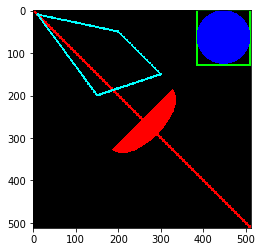

In [7]:
# Draw a line using cv2.polylines(image, points, isClosed, rgb, thinkness, lineType, shift)
pts = np.array([[10,10],[150,200],[300,150],[200,50]], np.int32)
pts = pts.reshape((-1,1,2))
cv2.polylines(img2,[pts],True,(0,255,255),3)
# => Cyan closed quadrangle 

print(pts)
plt.imshow(img2)

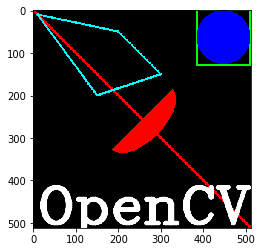

In [8]:
# Put some text using cv2.putText(image, text, bottomLeft, fontType, fontScale, rgb, thinkness, lineType)
font = cv2.FONT_HERSHEY_COMPLEX
cv2.putText(img2, 'OpenCV', (10,500), font, 4, (255,255,255), 10, cv2.LINE_AA)
# => White 'OpenCV' text at the bottom

plt.imshow(img2)

---

## 2. Modify pixels & ROI

- You can access/modify a single pixel or ROI (Region of Interest) using Numpy indexing.
- Just like matrix indexing, `img[a, b]` refer to `a`-th row and `b`-th column.

In [9]:
# Access a pixel value(BGR order)
img[50, 135]

array([173, 186, 178], dtype=uint8)

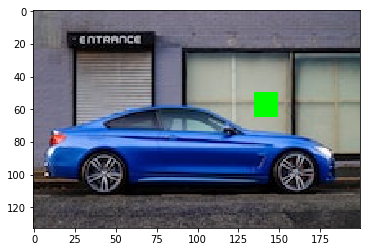

In [10]:
# Change pixel values
for i in range(15):
    for j in range(15):
        img[50+i, 135+j] = (0, 255, 0)


plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

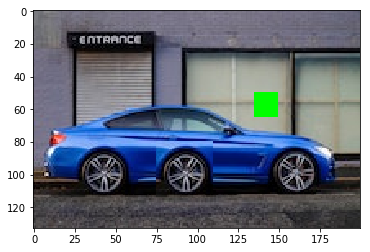

In [11]:
# ROI is obtained using Numpy indexing 
ball = img[80:115, 25:60]
img[80:115, 75:110] = ball

# img[50:65, 135:150] = (0, 255, 0)  # The for-loop in the code block above is equavalent to this line. 

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

---

### Reference

Please see the following official tutorials for more detailed explanation.

 - [Basic Operations on Images — OpenCV documentation](http://docs.opencv.org/3.0-beta/doc/py_tutorials/py_core/py_basic_ops/py_basic_ops.html)
 - [Drawing Functions in OpenCV — OpenCV documentation](http://docs.opencv.org/3.0-beta/doc/py_tutorials/py_gui/py_drawing_functions/py_drawing_functions.html)

# Trasformazioni geometriche
Rivediamo alcune delle trasformazioni già viste nei notebook precedenti ma utilizzando opencv

shape = (133, 200, 3)


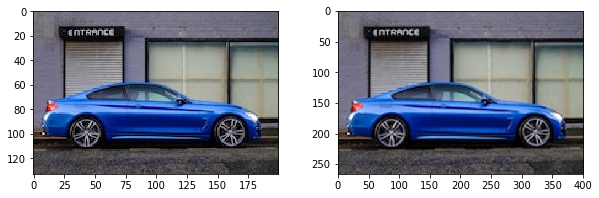

In [12]:
# Scaling
img = cv2.imread(myResourcePath('car.jpg'), cv2.IMREAD_COLOR)
print(f'shape = {img.shape}')
height, width = img.shape[:2]
res = cv2.resize(img,(2*width, 2*height), interpolation = cv2.INTER_CUBIC)

plt.figure(figsize=(10,3))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))

Traslare significa imporre uno spostamento sugli assi *x* e *y*. Quindi si applica una mastrice di trasformazione dove vengono indicati i valori *t1* per lo spostamento su *x* e *t2* per quello su *y*.

M = \begin{bmatrix} 1 & 0 & t1 \\ 0 & 1 & t2 \end{bmatrix}

         
WARNING: Third argument of the cv2.warpAffine() function is the size of the output image, which should be in the form of (width, height). Remember width = number of columns, and height = number of rows.

shape = (133, 200)
[[  1.   0. 100.]
 [  0.   1.  50.]]


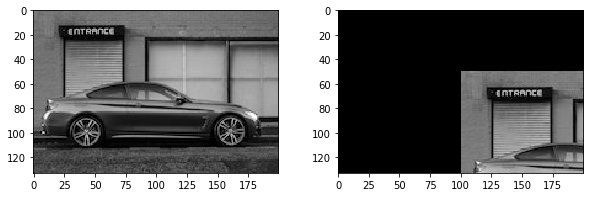

In [13]:
# Translation
img = cv2.imread(myResourcePath('car.jpg'), cv2.IMREAD_GRAYSCALE)
print(f'shape = {img.shape}')
rows,cols = img.shape

M = np.float32([[1,0,100],[0,1,50]]) # 3 x 2
print(M)
dst = cv2.warpAffine(img, M, (cols,rows))

plt.figure(figsize=(10,3))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(dst, cmap='gray')

Rotation

Rotation of an image for an angle \theta is achieved by the transformation matrix of the form

M = \begin{bmatrix} cos\theta & -sin\theta \\ sin\theta & cos\theta \end{bmatrix}

But OpenCV provides scaled rotation with adjustable center of rotation so that you can rotate at any location you prefer. Modified transformation matrix is given by

\begin{bmatrix} \alpha & \beta & (1- \alpha ) \cdot center.x - \beta \cdot center.y \\ - \beta & \alpha & \beta \cdot center.x + (1- \alpha ) \cdot center.y \end{bmatrix}

where:

\begin{array}{l} \alpha = scale \cdot \cos \theta , \\ \beta = scale \cdot \sin \theta \end{array}

To find this transformation matrix, OpenCV provides a function, cv2.getRotationMatrix2D. Check below example which rotates the image by 90 degree with respect to center without any scaling.

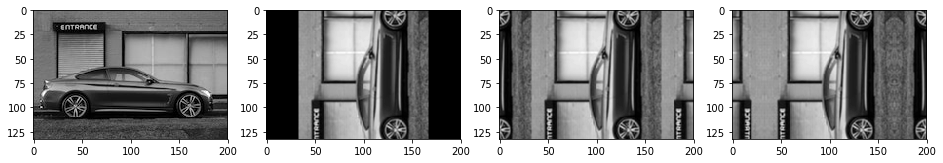

In [14]:
img = cv2.imread(myResourcePath('car.jpg'), cv2.IMREAD_GRAYSCALE)
rows,cols = img.shape

M = cv2.getRotationMatrix2D((cols/2,rows/2),90,1) # params: center, angle, scale
dst1 = cv2.warpAffine(img,M,(cols,rows))
dst2 = cv2.warpAffine(img,M,(cols,rows),borderMode=cv2.BORDER_WRAP)
dst3 = cv2.warpAffine(img,M,(cols,rows),borderMode=cv2.BORDER_REFLECT)

plt.figure(figsize=(16,3))
plt.subplot(1, 4, 1)
plt.imshow(img, cmap='gray')
plt.subplot(1, 4, 2)
plt.imshow(dst1, cmap='gray')
plt.subplot(1, 4, 3)
plt.imshow(dst2, cmap='gray')
plt.subplot(1, 4, 4)
plt.imshow(dst3, cmap='gray')

## Affine Transformation

In affine transformation, all parallel lines in the original image will still be parallel in the output image. To find the transformation matrix, we need three points from input image and their corresponding locations in output image. Then cv2.getAffineTransform will create a 2x3 matrix which is to be passed to cv2.warpAffine.

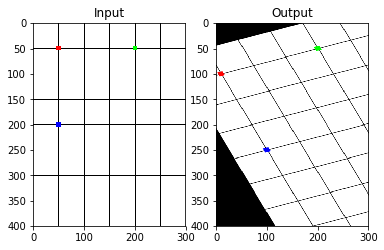

In [15]:
img = cv2.imread(myResourcePath('drawing.png'))
rows,cols, ch = img.shape

pts1 = np.float32([[50,50],[200,50],[50,200]])
pts2 = np.float32([[10,100],[200,50],[100,250]])

M = cv2.getAffineTransform(pts1,pts2)

dst = cv2.warpAffine(img,M,(cols,rows))

plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()


## Perspective Transformation

For perspective transformation, you need a 3x3 transformation matrix. Straight lines will remain straight even after the transformation. To find this transformation matrix, you need 4 points on the input image and corresponding points on the output image. Among these 4 points, 3 of them should not be collinear. Then transformation matrix can be found by the function cv2.getPerspectiveTransform. Then apply cv2.warpPerspective with this 3x3 transformation matrix.

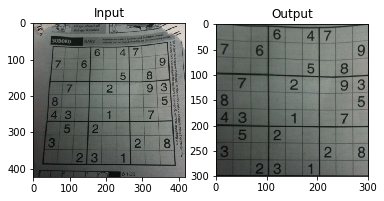

In [16]:
img = cv2.imread(myResourcePath('sudokuoriginal.jpg'))
rows,cols,ch = img.shape

pts1 = np.float32([[56,65],[368,52],[28,387],[389,390]])
pts2 = np.float32([[0,0],[300,0],[0,300],[300,300]])

M = cv2.getPerspectiveTransform(pts1,pts2)

dst = cv2.warpPerspective(img,M,(300,300))

plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

Semantica del metodo

    dst = cv.warpPerspective(src, M, dsize[, dst[, flags[, borderMode[, borderValue]]]])

- **src** input image.
- **M** 3×3 transformation matrix.
- **dsize** size of the output image.
- **dst** output image that has the size dsize and the same type as src 
- **flags** combination of interpolation methods (INTER_LINEAR or INTER_NEAREST) and the optional flag WARP_INVERSE_MAP, that sets M as the inverse transformation ( 𝚍𝚜𝚝→𝚜𝚛𝚌 ).
- **borderMode** pixel extrapolation method (BORDER_CONSTANT or BORDER_REPLICATE).
- **borderValue** value used in case of a constant border; by default, it equals 0.

[[ 6.87722951e-02 -1.24273581e+00  6.71000000e+02]
 [ 8.66486286e-02  4.83370157e-02  3.14000000e+02]
 [-7.63013127e-04 -3.68781623e-04  1.00000000e+00]]


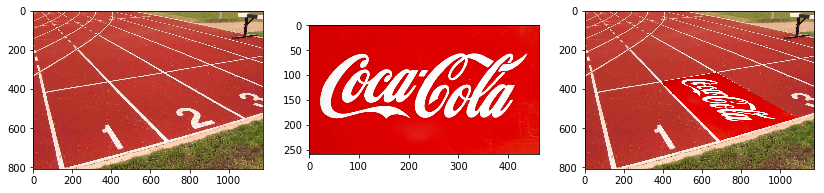

In [17]:
# la trasformazione può essere utilizzata anche per integrare un'immagine nell'altra

img1 = cv2.imread(myResourcePath('track.jpg'))
logo = cv2.imread(myResourcePath('logo.jpg'))
rows1,cols1,ch1 = img1.shape
rows2,cols2,ch2 = logo.shape

pts1 = np.float32([(0,0),(cols2-1,0),(cols2-1,rows2-1),(0,rows2-1)])
pts2 = np.float32([(671,314),(1084,546),(689,663),(386,361)])

M = cv2.getPerspectiveTransform(pts1,pts2)
print(M)
imgResult = np.copy(img1)
cv2.warpPerspective(logo,M,(cols1,rows1),imgResult,borderMode=cv2.BORDER_TRANSPARENT)

plt.figure(figsize=(14,3))
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(logo, cv2.COLOR_BGR2RGB))
plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(imgResult, cv2.COLOR_BGR2RGB))

## Analisi con istogrammi

Tramite openCV è possibile visualizzare gli istogrammi sui singoli canali oppure possiamo utilizzare la codifica HSV (hue, saturation, value) per un'analisi su tonalità, saturazione e luminosità

flattened feature vector size: (768,)


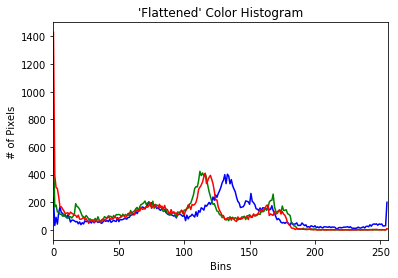

In [18]:
img = cv2.imread(myResourcePath('car.jpg'), cv2.IMREAD_COLOR)
chans = cv2.split(img)
colors = ("b", "g", "r")
plt.figure()
plt.title("'Flattened' Color Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
features = []
# loop over the image channels
for (chan, color) in zip(chans, colors):
    # create a histogram for the current channel and
    # concatenate the resulting histograms for each
    # channel
    hist = cv2.calcHist([chan], [0], None, [256], [0, 256])
    features.extend(hist)
    # plot the histogram
    plt.plot(hist, color = color)
    plt.xlim([0, 256])
# here we are simply showing the dimensionality of the
# flattened color histogram 256 bins for each channel
# x 3 channels = 768 total values -- in practice, we would
# normally not use 256 bins for each channel, a choice
# between 32-96 bins are normally used, but this tends
# to be application dependent
print(f'flattened feature vector size: {np.array(features).flatten().shape}')

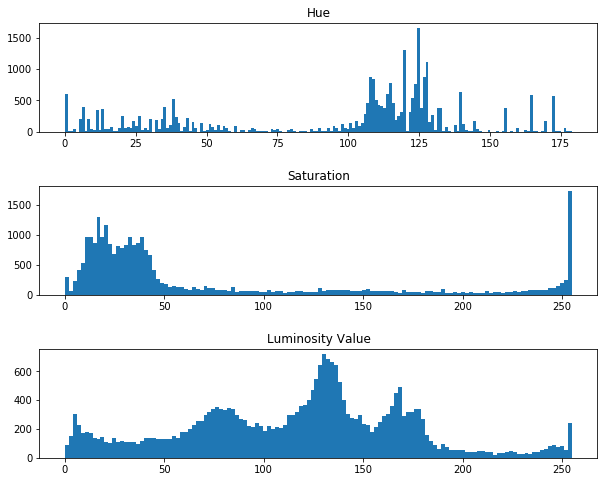

In [19]:
img = cv2.imread(myResourcePath('car.jpg'), cv2.IMREAD_COLOR)
img_hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)

hue, sat, val = img_hsv[:,:,0], img_hsv[:,:,1], img_hsv[:,:,2]

plt.figure(figsize=(10,8))
plt.subplot(311)                             #plot in the first cell
plt.subplots_adjust(hspace=.5)
plt.title("Hue")
plt.hist(np.ndarray.flatten(hue), bins=180)
plt.subplot(312)                             #plot in the second cell
plt.title("Saturation")
plt.hist(np.ndarray.flatten(sat), bins=128)
plt.subplot(313)                             #plot in the third cell
plt.title("Luminosity Value")
plt.hist(np.ndarray.flatten(val), bins=128)
plt.show()

## Blurring/smoothing



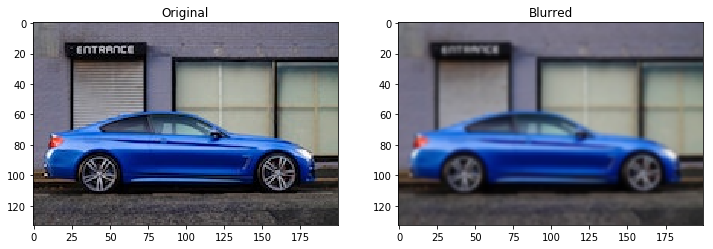

In [20]:
img = cv2.imread(myResourcePath('car.jpg'), cv2.IMREAD_COLOR)

blur = cv2.GaussianBlur(img,(5,5),0)

plt.figure(figsize=(12, 8))
plt.subplot(121)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original')

plt.subplot(122)
plt.imshow(cv2.cvtColor(blur, cv2.COLOR_BGR2RGB))
plt.title('Blurred')
plt.show()

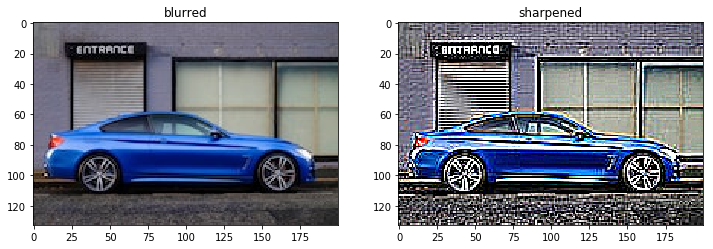

In [21]:
#---Sharpening filter----
kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
img2 = cv2.filter2D(img, -1, kernel)

plt.figure(figsize=(12, 8))
plt.subplot(121)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original')

plt.subplot(122)
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.title('sharpened')
plt.show()

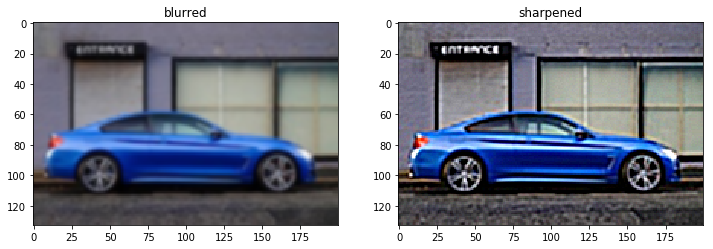

In [22]:
#---Sharpening filter----
kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
img2 = cv2.filter2D(blur, -1, kernel)

plt.figure(figsize=(12, 8))
plt.subplot(121)
plt.imshow(cv2.cvtColor(blur, cv2.COLOR_BGR2RGB))
plt.title('blurred')

plt.subplot(122)
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.title('sharpened')
plt.show()

# Image Thresholding

Si applica una funzione a soglia. Se un pixel è maggiore di un certa soglia viene sostituito con un colore target (es. bianco), altrimenti si utilizza un altro colore target (es. nero)

    for each pixel
        pixel = A if pixel > threashold else B

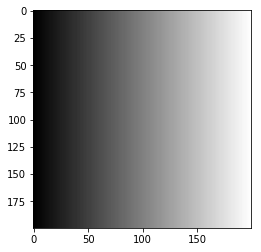

In [23]:
img = np.zeros((200, 200), dtype=np.uint8)

grey_x = np.linspace(0, 255, 200)

img[..., :] = grey_x

plt.imshow(img, cmap='gray')


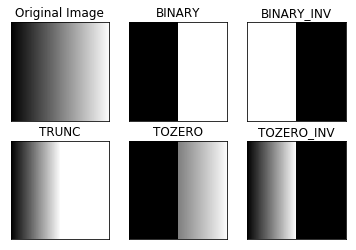

In [24]:

ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

## Arithmetic operations

Posso anche applicare delle operazioni arithmetiche

In [25]:
x = np.uint8([250])
y = np.uint8([10])

print( cv2.add(x,y) ) # 250+10 = 260 => 255

print( x+y )          # 250+10 = 260 % 256 = 4

[[255]]
[4]


shape img1 = (133, 200, 3)
shape img2 = (423, 419, 3)
shape img2 after resize = (133, 200, 3)


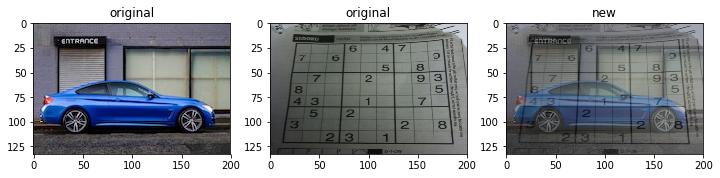

In [26]:
img1 = cv2.imread(myResourcePath('car.jpg'), cv2.IMREAD_COLOR)
img2 = cv2.imread(myResourcePath('sudokuoriginal.jpg'), cv2.IMREAD_COLOR)

print(f'shape img1 = {img1.shape}')
print(f'shape img2 = {img2.shape}')

H, W, _ = img1.shape
img2 = cv2.resize(img2, (W, H))
print(f'shape img2 after resize = {img2.shape}')

# dst = src1*alpha + src2*beta + gamma;
dst = cv2.addWeighted(img1, 0.4, img2, 0.6, 0)

plt.figure(figsize=(12, 8))
plt.subplot(131)
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.title('original')

plt.subplot(132)
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.title('original')

plt.subplot(133)
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
plt.title('new')
plt.show()

## Bitwise Operations 

Operatori AND, OR, NOT, and XOR. Utili, per esempio, per estrarre porzioni di un'immagine

shape img1 = (133, 200, 3)
shape img2 = (260, 462, 3)
shape img2 resized = (52, 92, 3)


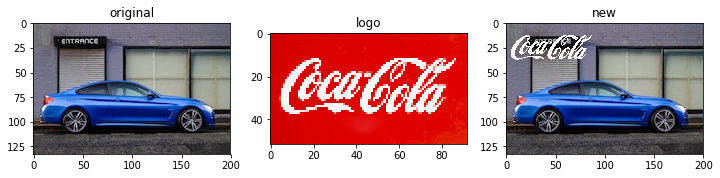

In [27]:
img1 = cv2.imread(myResourcePath('car.jpg'), cv2.IMREAD_COLOR)
img2 = cv2.imread(myResourcePath('logo.jpg'), cv2.IMREAD_COLOR)

print(f'shape img1 = {img1.shape}')
print(f'shape img2 = {img2.shape}')

# reduce logo size
H, W, _ = img2.shape
H = int(H / 5)
W = int(W / 5)
img2 = cv2.resize(img2, (W, H))

rows, cols, _ = img2.shape
print(f'shape img2 resized = {img2.shape}')

# I want to put logo on top-left corner, So I create a ROI
roi = img1[0:rows, 0:cols]

# Now create a mask of logo and create its inverse mask also
img2gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
ret, mask = cv2.threshold(img2gray, 230, 255, cv2.THRESH_BINARY)
mask_inv = cv2.bitwise_not(mask)

# Now black-out the area of logo in ROI
img1_bg = cv2.bitwise_and(roi, roi, mask=mask_inv)

# Take only region of logo from logo image.
img2_fg = cv2.bitwise_and(img2, img2, mask=mask)

# Put logo in ROI and modify the main image
dst = cv2.add(img1_bg, img2_fg)
img1edit = img1.copy()
img1edit[0:rows, 0:cols] = dst

plt.figure(figsize=(12, 8))
plt.subplot(131)
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.title('original')

plt.subplot(132)
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.title('logo')

plt.subplot(133)
plt.imshow(cv2.cvtColor(img1edit, cv2.COLOR_BGR2RGB))
plt.title('new')
plt.show()
